In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
import warnings
warnings.filterwarnings("ignore")
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
data = pd.read_csv('D:/bro work/logistic regression thesis/bank.csv')

data

,loan_applicant_id,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,Default
0,191,44,university.degree,10,20,192,12.116645,14.377313,8.886645,1
1,34318,34,high.school,3,18,57,14.264229,5.137880,2.992730,0
2,14932,45,university.degree,14,24,212,7.285681,10.460306,4.985339,0
3,2776,33,illiterate,12,5,418,11.386272,3.040189,44.554429,1
4,11915,20,basic,4,19,122,28.418494,14.560450,20.110112,0
...,...,...,...,...,...,...,...,...,...,...
41183,33354,49,high.school,4,4,114,12.296137,4.868954,9.148643,0
41184,38993,52,professional.course,13,16,178,21.421341,23.210634,14.919353,0
41185,1765,42,university.degree,18,15,264,9.821804,12.290464,13.639099,1
41186,32593,21,university.degree,12,24,56,23.998647,8.108453,5.330789,0


In [69]:
data['education'].unique()

array(['university.degree', 'high.school', 'illiterate', 'basic',
       'professional.course'], dtype=object)

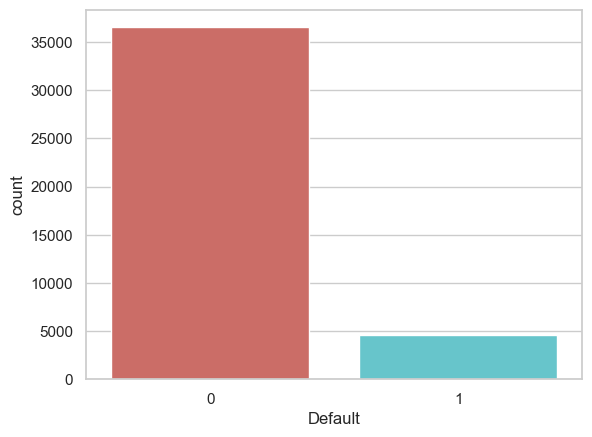

In [70]:
sns.countplot(x='Default', data=data, palette='hls')
plt.show()

In [71]:
data.groupby('Default').mean()

,loan_applicant_id,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt
Default,,,,,,,,
0,22914.5,37.975676,13.447521,15.497729,128.300646,15.514879,7.810996,12.127154
1,2320.5,38.261207,14.356034,14.500000,229.554957,21.810028,23.489629,26.605214


In [73]:
cat_vars=['education']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['education']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [74]:

data_final=data[to_keep]
data_final.drop(['loan_applicant_id'], axis=1, inplace=True)
data_final.columns.values

array(['age', 'years_with_current_employer', 'years_at_current_address',
       'household_income', 'debt_to_income_ratio', 'credit_card_debt',
       'other_debt', 'Default', 'education_basic',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree'],
      dtype=object)

In [75]:
data_final

,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,Default,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,44,10,20,192,12.116645,14.377313,8.886645,1,0,0,0,0,1
1,34,3,18,57,14.264229,5.137880,2.992730,0,0,1,0,0,0
2,45,14,24,212,7.285681,10.460306,4.985339,0,0,0,0,0,1
3,33,12,5,418,11.386272,3.040189,44.554429,1,0,0,1,0,0
4,20,4,19,122,28.418494,14.560450,20.110112,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,49,4,4,114,12.296137,4.868954,9.148643,0,0,1,0,0,0
41184,52,13,16,178,21.421341,23.210634,14.919353,0,0,0,0,1,0
41185,42,18,15,264,9.821804,12.290464,13.639099,1,0,0,0,0,1
41186,21,12,24,56,23.998647,8.108453,5.330789,0,0,0,0,0,1


In [76]:
X = data_final.loc[:, data_final.columns != 'Default']
y = data_final.loc[:, data_final.columns == 'Default']


In [77]:
X

,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,44,10,20,192,12.116645,14.377313,8.886645,0,0,0,0,1
1,34,3,18,57,14.264229,5.137880,2.992730,0,1,0,0,0
2,45,14,24,212,7.285681,10.460306,4.985339,0,0,0,0,1
3,33,12,5,418,11.386272,3.040189,44.554429,0,0,1,0,0
4,20,4,19,122,28.418494,14.560450,20.110112,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,49,4,4,114,12.296137,4.868954,9.148643,0,1,0,0,0
41184,52,13,16,178,21.421341,23.210634,14.919353,0,0,0,1,0
41185,42,18,15,264,9.821804,12.290464,13.639099,0,0,0,0,1
41186,21,12,24,56,23.998647,8.108453,5.330789,0,0,0,0,1


In [78]:
os = SMOTE(random_state=42)
os_data_X,os_data_y = os.fit_resample(X, y)
columns = X.columns
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['Default'])
# we can Check the numbers of our data
print("\033[1m length of oversampled data is ",len(os_data_X))
print("\033[1m Number of no default in oversampled data",len(os_data_y[os_data_y['Default']==0]))
print("\033[1m Number of default",len(os_data_y[os_data_y['Default']==1]))
print("\033[1m Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['Default']==0])/len(os_data_X))
print("\033[1m Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['Default']==1])/len(os_data_X))

 length of oversampled data is  73096
 Number of no default in oversampled data 36548
 Number of default 36548
 Proportion of no default data in oversampled data is  0.5
 Proportion of default data in oversampled data is  0.5


In [79]:
data_final_vars=data_final.columns.values.tolist()
y=['Default']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()

rfe = RFE(logreg,n_features_to_select=9, step=1)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True False  True  True  True  True  True  True]
[2 1 4 1 1 3 1 1 1 1 1 1]


In [80]:
os_data_X.columns

Index(['age', 'years_with_current_employer', 'years_at_current_address',
       'household_income', 'debt_to_income_ratio', 'credit_card_debt',
       'other_debt', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'],
      dtype='object')

In [81]:
data_X1 = pd.DataFrame({
    'Feature': os_data_X.columns,
    'Importance': rfe.ranking_},)
data_X1.sort_values(by=['Importance'])

,Feature,Importance
1,years_with_current_employer,1
3,household_income,1
4,debt_to_income_ratio,1
6,other_debt,1
7,education_basic,1
8,education_high.school,1
9,education_illiterate,1
10,education_professional.course,1
11,education_university.degree,1
0,age,2


In [82]:
cols=[]
for i in range (0, len(data_X1["Importance"])):
    if data_X1["Importance"][i] == 1:
        cols.append(data_X1["Feature"][i])
print(cols)
print(len(cols))

['years_with_current_employer', 'household_income', 'debt_to_income_ratio', 'other_debt', 'education_basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree']
9


In [83]:
X=os_data_X[cols]
y=os_data_y['Default']

In [84]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.270006
         Iterations 8
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.610     
Dependent Variable:       Default              AIC:                  39490.7159
Date:                     2023-05-28 00:53     BIC:                  39573.5116
No. Observations:         73096                Log-Likelihood:       -19736.   
Df Model:                 8                    LL-Null:              -50666.   
Df Residuals:             73087                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           8.0000                                               
-------------------------------------------------------------------------------
                               Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [85]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [86]:
X_train.shape, X_test.shape

((51167, 9), (21929, 9))

In [87]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
ytrain_pred = logreg.predict(X_train)
confusion_matrix = confusion_matrix(y_train, ytrain_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_train, ytrain_pred)))
print(confusion_matrix)
print(classification_report(y_train, ytrain_pred))

Accuracy of logistic regression classifier on test set: 0.91
[[24953   532]
 [ 4212 21470]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     25485
           1       0.98      0.84      0.90     25682

    accuracy                           0.91     51167
   macro avg       0.92      0.91      0.91     51167
weighted avg       0.92      0.91      0.91     51167



In [88]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[10834   229]
 [ 1802  9064]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     11063
           1       0.98      0.83      0.90     10866

    accuracy                           0.91     21929
   macro avg       0.92      0.91      0.91     21929
weighted avg       0.92      0.91      0.91     21929



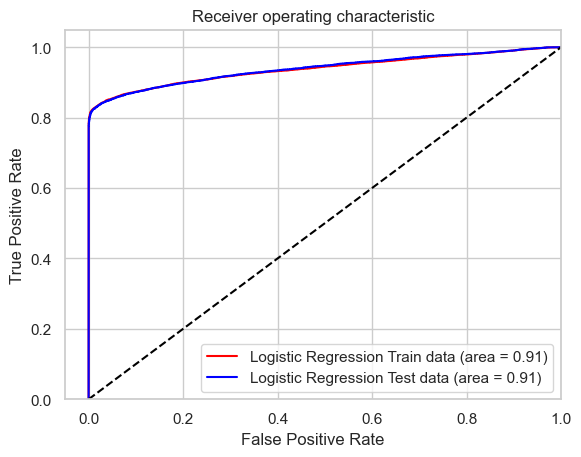

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

logit_roc_auc_train = roc_auc_score(y_train, logreg.predict(X_train))
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr_train, tpr_train, label='Logistic Regression Train data (area = %0.2f)' % logit_roc_auc_train,color="red")

plt.plot(fpr, tpr, label='Logistic Regression Test data (area = %0.2f)' % logit_roc_auc,color="blue")
plt.plot([0, 1], [0, 1],'--',color="black")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Validation

In [50]:
validation = pd.read_csv('D:/bro work/logistic regression thesis/validation.csv')
validation

,id,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt
0,31657,38,professional.course,2,3,125,28.881234,17.352960,18.748582
1,28623,41,high.school,19,0,218,18.270049,18.963007,20.865699
2,12740,54,illiterate,4,28,169,27.565024,2.795264,43.789626
3,31275,27,university.degree,9,6,16,21.616511,0.230558,3.228083
4,10571,32,university.degree,11,29,155,11.968007,10.114769,8.435641
...,...,...,...,...,...,...,...,...,...
2155,33354,49,high.school,4,4,114,12.296137,4.868954,9.148643
2156,38993,52,professional.course,13,16,178,21.421341,23.210634,14.919353
2157,1765,42,university.degree,18,15,264,9.821804,12.290464,13.639099
2158,32593,21,university.degree,12,24,56,23.998647,8.108453,5.330789


In [51]:
cat_vars=['education']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(validation[var], prefix=var)
    data1=validation.join(cat_list)
    validation=data1
cat_vars=['education']
data_vars=validation.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [52]:

validation_final=validation[to_keep]
validation_final.drop(['id'], axis=1, inplace=True)
validation_final.columns.values

array(['age', 'years_with_current_employer', 'years_at_current_address',
       'household_income', 'debt_to_income_ratio', 'credit_card_debt',
       'other_debt', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'], dtype=object)

In [53]:
X_final=validation_final[['years_with_current_employer',
       'household_income', 'debt_to_income_ratio', 
       'other_debt', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree']]

In [54]:
X_final

,years_with_current_employer,household_income,debt_to_income_ratio,other_debt,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,2,125,28.881234,18.748582,0,0,0,1,0
1,19,218,18.270049,20.865699,0,1,0,0,0
2,4,169,27.565024,43.789626,0,0,1,0,0
3,9,16,21.616511,3.228083,0,0,0,0,1
4,11,155,11.968007,8.435641,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2155,4,114,12.296137,9.148643,0,1,0,0,0
2156,13,178,21.421341,14.919353,0,0,0,1,0
2157,18,264,9.821804,13.639099,0,0,0,0,1
2158,12,56,23.998647,5.330789,0,0,0,0,1


In [55]:
yvalid_pred = logreg.predict(X_final)
yvalid_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [56]:
validation['Probability'] = logreg.predict_proba(X_final)[:,1]
validation[['id', 'Probability']]

,id,Probability
0,31657,0.289955
1,28623,0.355780
2,12740,0.245193
3,31275,0.053152
4,10571,0.132488
...,...,...
2155,33354,0.075513
2156,38993,0.341497
2157,1765,0.363057
2158,32593,0.109892


# Assume New Data 

In [57]:
new_data = np.array([12,40,13.62,3.993,0,1,0,0,0]).reshape(1, -1)
new_pred=logreg.predict_proba(new_data)[:,1][0]
print("\033[1m This new loan applicant has a {:.2%}".format(new_pred), "chance of defaulting")

 This new loan applicant has a 3.62% chance of defaulting


In [58]:
new_data = np.array([19,117,14.26,2.993,0,0,0,0,1]).reshape(1, -1)
new_pred=logreg.predict_proba(new_data)[:,1][0]
print("\033[1m This new loan applicant has a {:.2%}".format(new_pred), "chance of defaulting")

 This new loan applicant has a 11.69% chance of defaulting


In [59]:
new_data = np.array([19,117,28.26,42.993,0,0,0,0,1]).reshape(1, -1)
new_pred=logreg.predict_proba(new_data)[:,1][0]
print("\033[1m This new loan applicant has a {:.2%}".format(new_pred), "chance of defaulting")

 This new loan applicant has a 15.12% chance of defaulting


In [60]:
new_data = np.array([19,117,28.26,42.993,1,0,0,0,0]).reshape(1, -1)
new_pred=logreg.predict_proba(new_data)[:,1][0]
print("\033[1m This new loan applicant has a {:.2%}".format(new_pred), "chance of defaulting")

 This new loan applicant has a 15.31% chance of defaulting


In [61]:
new_data = np.array([19,7,2,4,0,1,0,0,0]).reshape(1, -1)
new_pred=logreg.predict_proba(new_data)[:,1][0]
print("\033[1m This new loan applicant has a {:.2%}".format(new_pred), "chance of defaulting")

 This new loan applicant has a 0.78% chance of defaulting


In [62]:
new_data = np.array([19,10,2,4,0,0,0,0,1]).reshape(1, -1)
new_pred=logreg.predict_proba(new_data)[:,1][0]
print("\033[1m This new loan applicant has a {:.2%}".format(new_pred), "chance of defaulting")

 This new loan applicant has a 0.80% chance of defaulting
